In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
# Read the CSV file and load into a DataFrame
df_youtube = pd.read_csv('topSubscribed.csv',thousands=',') #Con la propiedad thousands se resuelve lo solicitado en el punto d y g
df_youtube

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014
997,998,YtCrash,11400000,3825084,1,Education,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015


In [3]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [4]:
#Statistics
df_youtube.describe()

,Rank,Subscribers,Video Views,Video Count,Started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.158140e+07,9.994912e+09,9416.228000,2012.594000
std,288.819436,1.662556e+07,1.300546e+10,32190.909114,4.110238
min,1.000000,1.140000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.340000e+07,3.871470e+09,365.500000,2010.000000
50%,500.500000,1.660000e+07,6.723360e+09,896.000000,2013.000000
75%,750.250000,2.320000e+07,1.223052e+10,3277.250000,2015.000000
max,1000.000000,2.340000e+08,2.129003e+11,342802.000000,2021.000000


In [5]:
# Null values
df_youtube.loc[df_youtube.isnull().any(axis='columns')]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started


In [6]:
#Duplicated values for the column "Youtube Channel"
df_youtube[df_youtube.duplicated('Youtube Channel',False)]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
116,117,Bollywood Classics,32800000,20441345965,1959,Music,2012
580,581,Bollywood Classics,15200000,6499358216,1265,Entertainment,2011


In [7]:
#Quantity of inputs by category
df_youtube ['Category'].value_counts().sort_values(ascending= True)

Travel & Events                                                                   1
Autos & Vehicles                                                                  1
Movies                                                                            2
Nonprofits & Activism                                                             2
Trailers                                                                          2
Pets & Animals                                                                    6
Sports                                                                           10
Shows                                                                            14
Science & Technology                                                             18
News & Politics                                                                  27
https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels     30
Howto & Style                                                               

In [8]:
# Drop specifics rows from the column "Category" on the datframe
new_youtube = df_youtube.drop(
    df_youtube[df_youtube['Category'] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels'].index, axis=0)

new_youtube

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014
997,998,YtCrash,11400000,3825084,1,Education,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015


In [9]:
# New count, without the URL Category values
new_youtube['Category'].value_counts().sort_values(ascending=True)

Travel & Events            1
Autos & Vehicles           1
Movies                     2
Nonprofits & Activism      2
Trailers                   2
Pets & Animals             6
Sports                    10
Shows                     14
Science & Technology      18
News & Politics           27
Howto & Style             43
Education                 45
Film & Animation          50
Comedy                    68
Gaming                    94
People & Blogs           132
Music                    217
Entertainment            238
Name: Category, dtype: int64

In [10]:
# Channel with the most quantity of views

# find the index label of the row with the maximum value in the 'views' column
max_views_index = new_youtube['Video Views'].idxmax()

# select the row with the maximum views and the 'Channel' column
channel_with_most_views = new_youtube.loc[max_views_index, 'Youtube Channel']

# retrieve the value from the 'Video Views' column and the second row (index 1)
qty_views = new_youtube.loc[max_views_index, 'Video Views']

# print the result
print(f"The channel with the most views is: {channel_with_most_views} with: {qty_views} views")


The channel with the most views is: T-Series with: 212900271553 views


In [11]:
new_youtube.nlargest(1,'Video Views')

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006


Text(0.5, 0, 'Número de Suscriptores')

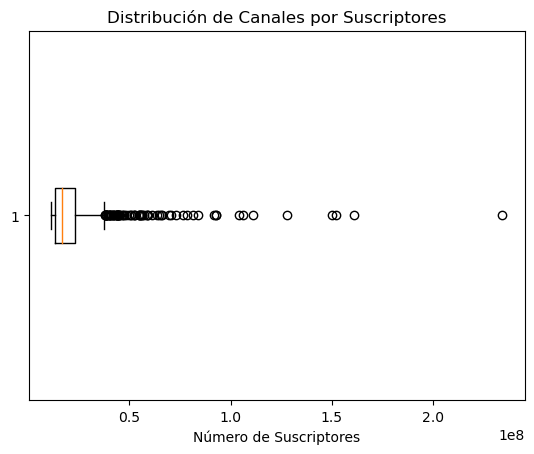

In [12]:
# channel distribution diagram by subscribers
plt.boxplot(x='Subscribers', data=new_youtube, vert= False)
plt.title("Distribución de Canales por Suscriptores")
plt.xlabel("Número de Suscriptores")

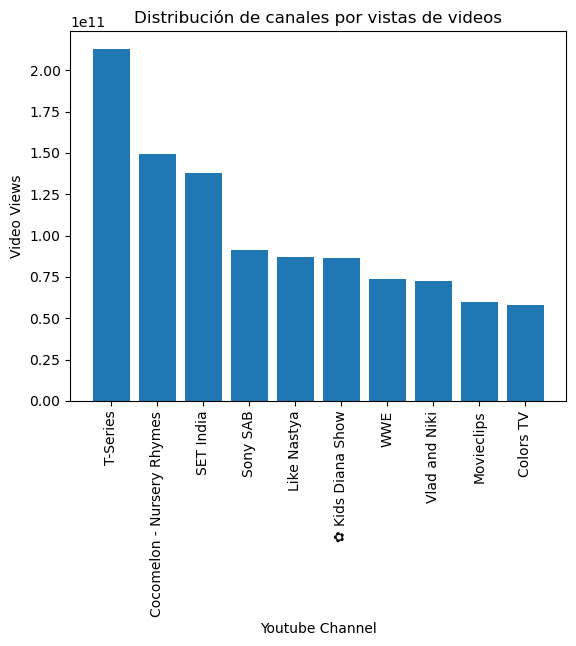

In [41]:
#Se implementa grafico de barras, para un mayor entendimiento del mismo solo se toman los 10 canales con mayor numero de vistas.

data_ordered_by_vv = new_youtube.sort_values(by='Video Views', ascending=False)
top_ten = data_ordered_by_vv.head(10)

plt.bar(top_ten["Youtube Channel"],
        top_ten["Video Views"],)
plt.xticks(rotation=90)
plt.xlabel("Youtube Channel")
plt.ylabel("Video Views")
plt.title("Distribución de canales por vistas de videos")
plt.show()


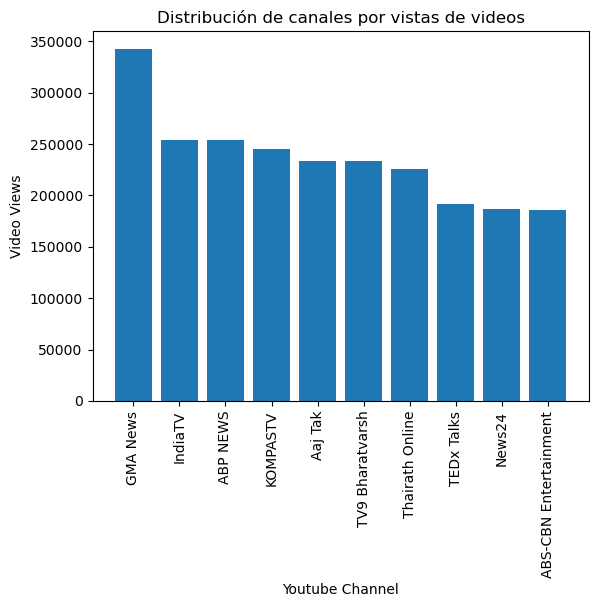

In [44]:
#Se implementa grafico de barras, para un mayor entendimiento del mismo solo se toman los 10 canales con mayor numero de videos.

data_ordered_by_nv = new_youtube.sort_values(by='Video Count', ascending=False)
top_ten_nv = data_ordered_by_nv.head(10)

plt.bar(top_ten_nv["Youtube Channel"],
        top_ten_nv["Video Count"],)
plt.xticks(rotation=90)
plt.xlabel("Youtube Channel")
plt.ylabel("Video Views")
plt.title("Distribución de canales por vistas de videos")
plt.show()


In [45]:
# Nuevo Dataframe para mantener el recuento de valores de categoría
CC = pd.DataFrame(new_youtube['Category'].value_counts())
CC


,Category
Entertainment,238
Music,217
People & Blogs,132
Gaming,94
Comedy,68
Film & Animation,50
Education,45
Howto & Style,43
News & Politics,27
Science & Technology,18
